In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# data_path = '/content/drive/MyDrive/ESG project dataset/dataset - indicators for comapnies x copy (version 1).xlsx'
data_path = '/content/ESG project dataset (1).xlsx'

df_comp = pd.read_excel(data_path, sheet_name=0)
df_tech = pd.read_excel(data_path, sheet_name=1)

In [6]:
df_comp.head()

,Company,Date,price change,ROA,ROE,Net Margin,revenue growth rate,Total CO2e emissions (market-based Scope 1 & 2) (Kt),Scope 3,Carbon intensity (tons of CO2e) / (USDm)
0,Inditex,2021,-31.16,4.04,7.52,5.42,37.693596,62.0,17098.0,1.9
1,Inditex,2020,32.98,14.53,25.00,12.87,-24.852946,111.0,13341.0,4.6
2,Inditex,2019,-13.23,16.43,24.47,13.17,2.850210,310.0,17989.0,9.7
3,Inditex,2018,-3.57,16.90,25.70,13.29,8.073144,439.0,18326.0,14.0
4,Inditex,2017,-8.00,17.07,26.17,13.54,11.326924,490.0,1711.0,17.0


In [7]:
df_tech.head()

,Company,Date,price change,ROA,ROE,Net Margin,revenue growth rate,Total CO2e emissions (market-based Scope 1 & 2) (Kt),Scope 3,Carbon intensity (tons of CO2e) / (USDm)
0,Apple,2020Q4,20.625611,19.30,87.97,25.80,1.135849,11.0,5598,0.2
1,Apple,2020Q3,25.761508,17.50,74.48,19.59,11.007435,12.0,6087,0.3
2,Apple,2020Q2,-4.885020,17.82,68.38,18.85,0.653967,11.0,5780,0.2
3,Apple,2020Q1,36.592724,17.19,63.09,19.29,8.894687,13.0,5230,0.2
4,Apple,2019Q4,-2.424242,16.76,57.90,24.22,2.845711,16.0,6043,0.2


In [6]:
df_tech.columns

Index(['Company', 'Date', 'price change', 'ROA', 'ROE', 'Net Margin',
       'revenue growth rate',
       'Total CO2e emissions (market-based Scope 1 & 2) (Kt)', 'Scope 3',
       'Carbon intensity (tons of CO2e) / (USDm)'],
      dtype='object')

In [7]:
from IPython.display import display


def proc_date(x):
    if not isinstance(x, str):
        return x
    else:
        return int(x[:4])


def proc_q(x):
    if not isinstance(x, str):
        return 0
    else:
        if len(x) > 4:
            # print(x)
            return int(x[5:])
        else:
            return 0


columns = df_tech.keys()

# df_comp = df_comp[columns]
# df_tech = df_tech[df_tech.columns[:-3]]

df_comp['Scope 3'] = (df_comp['Scope 3'] > 0).astype(int)
df_tech['Scope 3'] = (df_tech['Scope 3'] > 0).astype(int)

df_tech.dropna(inplace=True)
df_comp.dropna(inplace=True)

df_comp['Q'] = df_comp['Date'].apply(proc_q)
df_tech['Q'] = df_tech['Date'].apply(proc_q)

df_comp['Date'] = df_comp['Date'].apply(proc_date)
df_tech['Date'] = df_tech['Date'].apply(proc_date)

# df_comp['Date'] -= df_comp['Date'].min()
# df_tech['Date'] -= df_tech['Date'].min()
# df_tech['Date'] = df_tech.index[::-1]
# df_comp['Date'] = df_comp.index[::-1]
# for comp in df_tech['Company'].unique():
#     min_val = df_tech[df_tech['Company'] == comp]['Date'].min()
#     for i, row in df_tech[df_tech['Company'] == comp].iterrows():
#         row['Date'] -= min_val

In [8]:
df_tech

,Company,Date,price change,ROA,ROE,Net Margin,revenue growth rate,Total CO2e emissions (market-based Scope 1 & 2) (Kt),Scope 3,Carbon intensity (tons of CO2e) / (USDm),Q
0,Apple,2020,20.625611,19.30,87.97,25.80,1.135849,11.0,1,0.2,4
1,Apple,2020,25.761508,17.50,74.48,19.59,11.007435,12.0,1,0.3,3
2,Apple,2020,-4.885020,17.82,68.38,18.85,0.653967,11.0,1,0.2,2
3,Apple,2020,36.592724,17.19,63.09,19.29,8.894687,13.0,1,0.2,1
4,Apple,2019,-2.424242,16.76,57.90,24.22,2.845711,16.0,1,0.2,4
...,...,...,...,...,...,...,...,...,...,...,...
171,Meta,2013,-15.231643,0.49,0.59,15.02,151.813472,111.0,0,46.0,1
172,Meta,2012,-6.535948,0.44,0.54,4.04,43.200000,121.0,0,47.0,4
173,Meta,2012,4.772095,2.62,3.12,-4.68,27.600000,111.0,0,48.0,3
174,Meta,2012,3.247901,6.09,7.46,-13.26,12.300000,108.0,0,48.0,2


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display
from sklearn import linear_model
import statsmodels.api as sm

company_df = df_comp
company_df.dropna(inplace=True)
y = company_df['price change ']
X = company_df.drop(columns=['Company', 'price change '])
model = Lasso(alpha=0.0, normalize=True)
model.fit(X, y)
y_pred = model.predict(X)
print(f'r^2: {r2_score(y, y_pred):.4f}')
model.coef_

r^2: 0.0697


array([ 0.97331545, -0.91585203, -0.05972936,  0.11241386, -0.06544445,
       -0.02642634,  1.15615277,  0.91892279,  0.        ])

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display
from sklearn import linear_model
import statsmodels.api as sm

company_df = df_comp
company_df.dropna(inplace=True)
y = company_df['price change ']
X = company_df.drop(columns=['Company', 'price change '])

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()

predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          price change    R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.7587
Date:                Thu, 09 Jun 2022   Prob (F-statistic):              0.640
Time:                        08:29:56   Log-Likelihood:                -427.23
No. Observations:                  90   AIC:                             872.5
Df Residuals:                      81   BIC:                             895.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display


company_df = df_tech
company_df.dropna(inplace=True)
y = company_df['price change']
X = company_df.drop(columns=['Company', 'price change'])
model = Lasso(alpha=0.0, normalize=True)
model.fit(X, y)
y_pred = model.predict(X)
print(f'r^2: {r2_score(y, y_pred):.4f}')
model.coef_

r^2: 0.0794


array([-0.15111608,  0.13452218, -0.02902517, -0.01836012, -0.06425761,
       -0.02369854,  4.54838386,  0.06088386, -0.16329613])

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display
from sklearn import linear_model
import statsmodels.api as sm


company_df = df_tech
company_df.dropna(inplace=True)
y = company_df['price change']
X = company_df.drop(columns=['Company', 'price change',])

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()

predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           price change   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.591
Date:                Thu, 09 Jun 2022   Prob (F-statistic):              0.122
Time:                        10:07:46   Log-Likelihood:                -701.13
No. Observations:                 176   AIC:                             1422.
Df Residuals:                     166   BIC:                             1454.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display


company_df = df_comp
company_df.dropna(inplace=True)
y = company_df['ROA']
X = company_df['Total CO2e emissions (market-based Scope 1 & 2) (Kt)']
model = Lasso(alpha=0.0, normalize=True)
model.fit(X.to_numpy().reshape(-1, 1), y)
y_pred = model.predict(X.to_numpy().reshape(-1, 1))
print(f'r^2: {r2_score(y, y_pred):.4f}')
model.coef_

r^2: 0.0127


array([0.00587194])

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display
from sklearn import linear_model
import statsmodels.api as sm

company_df = df_comp
company_df.dropna(inplace=True)
y = company_df['ROA']
X = company_df.drop(columns=['Company', 'price change ', 'revenue growth rate', 'ROA', 'ROE', 'Net Margin'])

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()

predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     18.26
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           7.37e-11
Time:                        17:05:31   Log-Likelihood:                -298.55
No. Observations:                  90   AIC:                             607.1
Df Residuals:                      85   BIC:                             619.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display

company_df = df_tech
company_df.dropna(inplace=True)
y = company_df['ROA']
X = company_df['Total CO2e emissions (market-based Scope 1 & 2) (Kt)']
model = Lasso(alpha=0.0, normalize=True)
model.fit(X.to_numpy().reshape(-1, 1), y)
y_pred = model.predict(X.to_numpy().reshape(-1, 1))
print(f'r^2: {r2_score(y, y_pred):.4f}')
model.coef_

r^2: 0.0024


array([0.0015104])

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display
from sklearn import linear_model
import statsmodels.api as sm

company_df = df_tech
company_df.dropna(inplace=True)
y = company_df['ROA']
X = company_df.drop(columns=['Company', 'price change', 'revenue growth rate', 'ROA', 'ROE', 'Net Margin'])

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()

predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     11.98
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           6.07e-10
Time:                        08:48:21   Log-Likelihood:                -577.63
No. Observations:                 176   AIC:                             1167.
Df Residuals:                     170   BIC:                             1186.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display

company_df = df_tech
company_df.dropna(inplace=True)
y = company_df['ROE']
X = company_df['Total CO2e emissions (market-based Scope 1 & 2) (Kt)']
model = Lasso(alpha=0.0, normalize=True)
model.fit(X.to_numpy().reshape(-1, 1), y)
y_pred = model.predict(X.to_numpy().reshape(-1, 1))
print(f'r^2: {r2_score(y, y_pred):.4f}')
model.coef_

r^2: 0.1280


array([0.03463564])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display


company_df = df_tech
company_df.dropna(inplace=True)
y = company_df['ROE']
X = company_df['Total CO2e emissions (market-based Scope 1 & 2) (Kt)']
model = Lasso(alpha=0.0, normalize=True)
model.fit(X.to_numpy().reshape(-1, 1), y)
y_pred = model.predict(X.to_numpy().reshape(-1, 1))
print(f'r^2: {r2_score(y, y_pred):.4f}')
model.coef_

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display


company_df = df_comp
company_df.dropna(inplace=True)
y = company_df['ROE']
X = company_df['Total CO2e emissions (market-based Scope 1 & 2) (Kt)']
model = Lasso(alpha=0.0, normalize=True)
model.fit(X.to_numpy().reshape(-1, 1), y)
y_pred = model.predict(X.to_numpy().reshape(-1, 1))
print(f'r^2: {r2_score(y, y_pred):.4f}')
model.coef_

r^2: 0.0000


array([0.00102415])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display


result = {}

for company in df_comp['Company'].unique():
    company_df = df_comp[df_comp['Company'] == company]
    # display(company_df)
    company_df.dropna(inplace=True)
    y = company_df['price change']
    X = company_df.drop(columns=['Company', 'price change'])
    model = Lasso(alpha=0.0, normalize=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f'{company}, r^2: {r2_score(y, y_pred):.4f}')
    result[company] = model.coef_


pd.DataFrame(result, index=X.keys())

Apple, r^2: 0.5559
IBM, r^2: 0.4002
Nvidia, r^2: 0.2313
Texas instruments, r^2: 0.3627
Meta, r^2: 0.3758


,Apple,IBM,Nvidia,Texas instruments,Meta
Date,0.387340,0.123848,-1.897914,0.373792,-0.213826
stock price,0.918399,0.366520,0.293486,0.271976,0.115323
ROA,4.963787,2.032748,-2.167089,1.943058,-7.180545
ROE,-1.500703,-0.144081,1.265700,-1.203750,6.572454
Net Margin,1.002835,-0.040919,-0.175549,-0.003077,0.068647
revenue growth rate,0.266530,-0.486921,-0.430672,-0.304472,-0.116161
Total CO2e emissions (market-based Scope 1 & 2) (Kt),-0.326115,-0.005792,0.462956,-0.022289,0.238527
Scope 3,19.812417,0.000000,14.479085,0.000000,-12.177796
Carbon intensity (tons of CO2e) / (USDm),83.613002,-0.417830,-5.870661,0.360143,0.072291


In [ ]:
df_comp

,Company,Date,stock price,price change,ROA,ROE,Net Margin,revenue growth rate,Total CO2e emissions (market-based Scope 1 & 2) (Kt),Scope 3,Carbon intensity (tons of CO2e) / (USDm)
0,Apple,183,138.65,9.743549,37.84,185.18,27.94,28.891429,16.0,1,0.2
1,Apple,182,126.34,3.387889,24.15,129.08,24.65,36.227856,15.4,1,0.2
2,Apple,181,122.20,3.287972,26.08,138.34,26.70,53.606021,14.8,1,0.2
3,Apple,180,118.31,6.528003,27.35,139.61,26.38,21.363537,11.6,1,0.2
4,Apple,179,111.06,20.625611,19.30,87.97,25.80,1.135849,11.0,1,0.2
...,...,...,...,...,...,...,...,...,...,...,...
179,Meta,4,38.79,-15.231643,0.49,0.59,15.02,151.813472,111.0,0,46.0
180,Meta,3,45.76,-6.535948,0.44,0.54,4.04,43.200000,121.0,0,47.0
181,Meta,2,48.96,4.772095,2.62,3.12,-4.68,27.600000,111.0,0,48.0
182,Meta,1,46.73,3.247901,6.09,7.46,-13.26,12.300000,108.0,0,48.0


In [ ]:
result = {}

for company in df_comp['Company'].unique():
    company_df = df_comp[df_comp['Company'] == company]
    # company_df.dropna(inplace=True)
    # print(company_df.columns)
    y = company_df['price change']
    X = company_df.drop(columns=['Company', 'price change', 'stock price '])
    model = Lasso(alpha=0, normalize=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f'{company}, r^2: {r2_score(y, y_pred):.4f}')
    result[company] = model.coef_


pd.DataFrame(result, index=X.keys())

Apple, r^2: 0.2720
IBM, r^2: 0.0836
Nvidia, r^2: 0.2249
Texas instruments, r^2: 0.2600
Meta, r^2: 0.3402


,Apple,IBM,Nvidia,Texas instruments,Meta
Date,1.230659,-0.191196,-1.326977,0.823563,0.592773
ROA,2.290913,0.167356,-4.115485,0.364597,-7.288118
ROE,-0.472760,-0.005824,2.481534,-0.237169,6.696752
Net Margin,0.365682,-0.094231,-0.209969,-0.218620,0.089802
revenue growth rate,0.186182,-0.270466,-0.395855,-0.244498,-0.130663
Total CO2e emissions (market-based Scope 1 & 2) (Kt),-0.678809,0.013505,1.597348,0.007538,0.226268
Scope 3,3.776188,0.000000,8.130649,0.000000,-11.471507
Carbon intensity (tons of CO2e) / (USDm),88.373915,-0.666614,-6.615724,0.155189,0.214704


In [ ]:
result = {}

for company in df_comp['Company'].unique():
    company_df = df_comp[df_comp['Company'] == company]
    company_df.dropna(inplace=True)
    y = company_df['price change']
    X = company_df.drop(columns=['Company', 'price change', 'stock price ', 'revenue growth rate'])
    model = Lasso(alpha=0, normalize=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f'{company}, r^2: {r2_score(y, y_pred):.4f}')
    result[company] = model.coef_


pd.DataFrame(result, index=X.keys())

Apple, r^2: 0.2450
IBM, r^2: 0.0545
Nvidia, r^2: 0.1709
Texas instruments, r^2: 0.2077
Meta, r^2: 0.2547


,Apple,IBM,Nvidia,Texas instruments,Meta
Date,1.220191,-0.060930,-1.291323,0.619772,1.158036
ROA,1.720575,-0.163704,-2.220793,0.132417,-6.671396
ROE,-0.351765,0.057707,0.718799,-0.019281,6.373580
Net Margin,0.575695,-0.075841,-0.104957,-0.244648,-0.106059
Total CO2e emissions (market-based Scope 1 & 2) (Kt),-0.477909,0.014103,0.934827,0.001316,0.237916
Scope 3,-0.323361,0.000000,5.494802,0.000000,-12.875253
Carbon intensity (tons of CO2e) / (USDm),85.699468,-0.478365,-7.821880,0.138062,0.404529


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display


result = {}

for company in df_comp['Company'].unique():
    company_df = df_comp[df_comp['Company'] == company]
    # display(company_df)
    company_df.dropna(inplace=True)
    y = company_df['ROA']
    X = company_df['Total CO2e emissions (market-based Scope 1 & 2) (Kt)']
    model = Lasso(alpha=0.0, normalize=True)
    model.fit(X.to_numpy().reshape(-1, 1), y)
    y_pred = model.predict(X.to_numpy().reshape(-1, 1))
    print(f'{company}, r^2: {r2_score(y, y_pred):.4f}')
    result[company] = model.coef_

Apple, r^2: 0.0240
IBM, r^2: 0.8002
Nvidia, r^2: 0.0871
Texas instruments, r^2: 0.3616
Meta, r^2: 0.0646


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display


result = {}

for company in df_comp['Company'].unique():
    company_df = df_comp[df_comp['Company'] == company]
    # display(company_df)
    company_df.dropna(inplace=True)
    y = company_df['ROE']
    X = company_df['Total CO2e emissions (market-based Scope 1 & 2) (Kt)']
    model = Lasso(alpha=0.0, normalize=True)
    model.fit(X.to_numpy().reshape(-1, 1), y)
    y_pred = model.predict(X.to_numpy().reshape(-1, 1))
    print(f'{company}, r^2: {r2_score(y, y_pred):.4f}')
    result[company] = model.coef_


# pd.DataFrame(result, index=X.keys())

Apple, r^2: 0.2772
IBM, r^2: 0.4649
Nvidia, r^2: 0.0803
Texas instruments, r^2: 0.5546
Meta, r^2: 0.1400


In [ ]:
result = {}

for company in df_tech['Company'].unique():
    if not isinstance(company, str):
        continue

    company_df = df_tech[df_tech['Company'] == company]
    company_df.dropna(inplace=True)
    y = company_df['price change in cur']
    X = company_df.drop(columns=['Company', 'price change in cur'])
    model = Lasso(alpha=0.1, normalize=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f'{company}, r^2: {r2_score(y, y_pred):.4f}')
    result[company] = model.coef_


pd.DataFrame(result, index=X.keys())

Inditex, r^2: 0.9336
LVMH, r^2: 0.8193
Zalando, r^2: 0.9990
 L'oreal, r^2: 0.7587
H&M, r^2: 0.8996
Richemont, r^2: 0.8064
Next, r^2: 0.9623
Pandora, r^2: 0.9582
JD sports, r^2: 0.9239


,Inditex,LVMH,Zalando,L'oreal,H&M,Richemont,Next,Pandora,JD sports
Date,-4.702171,-1.373912,-15.361664,0.000000,-13.138631,-0.306817,-9.270531,0.000000,-0.000000
stock price in cur,1.295220,-0.000000,3.477547,0.244154,0.263391,0.748009,0.023939,0.089341,1.896027
ROA,-0.000000,8.767008,-0.000000,0.000000,-0.000000,7.060795,0.000000,-0.037964,19.033238
ROE,0.000000,0.000000,-1.056591,-2.308116,-1.271870,-0.000000,-0.426984,-0.000000,-0.000000
Net Margin,-0.000000,-3.982266,-0.000000,3.237587,-11.956072,-3.457768,0.000000,-3.945863,-57.192778
revenue growth rate,-0.696548,0.706228,-4.667095,-0.538592,0.863026,-1.331647,-1.559072,-0.136912,0.000000
Total CO2e emissions (market-based Scope 1 & 2) (Kt),-0.042795,-0.144633,-0.374680,0.365271,0.000000,-0.256939,-0.000000,-2.446398,4.417941
Scope 3,0.000000,44.203905,-0.000000,6.593697,0.000000,0.000000,0.000000,-0.000000,-114.648090
Carbon intensity (tons of CO2e) / (USDm),0.000000,2.185669,1.178184,0.000000,1.048016,0.000000,-0.000000,8.982270,0.000000


In [ ]:
result = {}

for company in df_tech['Company'].unique():
    if not isinstance(company, str):
        continue

    company_df = df_tech[df_tech['Company'] == company]
    company_df.dropna(inplace=True)
    y = company_df['price change in cur']
    X = company_df.drop(columns=['Company', 'price change in cur', 'stock price in cur'])
    model = Lasso(alpha=0.1, normalize=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f'{company}, r^2: {r2_score(y, y_pred):.4f}')
    result[company] = model.coef_


pd.DataFrame(result, index=X.keys())

Inditex, r^2: 0.8694
LVMH, r^2: 0.8193
Zalando, r^2: 0.9927
 L'oreal, r^2: 0.5316
H&M, r^2: 0.8700
Richemont, r^2: 0.7970
Next, r^2: 0.7897
Pandora, r^2: 0.9422
JD sports, r^2: 0.5455


,Inditex,LVMH,Zalando,L'oreal,H&M,Richemont,Next,Pandora,JD sports
Date,-2.371021,-1.373793,-63.296893,1.356768,-15.000838,-0.000000,-3.125714,4.780880,0.000000
ROA,-0.405800,8.766992,0.000000,-0.000000,0.000000,12.098675,-5.838376,0.000000,11.466345
ROE,0.000000,0.000000,31.858778,-3.292472,-2.421964,-7.684043,-0.000000,-0.430681,-0.927244
Net Margin,-0.000000,-3.982259,27.114972,4.704650,-9.726768,-0.000000,8.715976,-0.706272,-29.982945
revenue growth rate,-0.964783,0.706228,-3.843638,-0.191306,1.232533,-1.061890,-1.147193,0.262010,0.317504
Total CO2e emissions (market-based Scope 1 & 2) (Kt),-0.005849,-0.144631,-15.674272,-0.000000,0.000000,-0.918537,-1.550367,-4.610945,-13.574888
Scope 3,0.000000,44.203859,253.555126,3.746011,-0.000000,0.000000,0.000000,-2.460918,-42.063130
Carbon intensity (tons of CO2e) / (USDm),0.000000,2.185761,34.541740,-0.000000,10.471735,2.702386,7.034150,18.408702,27.225189


In [ ]:
result = {}

for company in df_tech['Company'].unique():
    if not isinstance(company, str):
        continue

    company_df = df_tech[df_tech['Company'] == company]
    company_df.dropna(inplace=True)
    y = company_df['price change in cur']
    X = company_df.drop(columns=['Company', 'price change in cur', 'stock price in cur', 'revenue growth rate'])
    model = Lasso(alpha=0.1, normalize=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f'{company}, r^2: {r2_score(y, y_pred):.4f}')
    result[company] = model.coef_


pd.DataFrame(result, index=X.keys())

Inditex, r^2: 0.7651
LVMH, r^2: 0.7101
Zalando, r^2: 0.9571
 L'oreal, r^2: 0.5356
H&M, r^2: 0.8039
Richemont, r^2: 0.8408
Next, r^2: 0.8094
Pandora, r^2: 0.9348
JD sports, r^2: 0.4089


,Inditex,LVMH,Zalando,L'oreal,H&M,Richemont,Next,Pandora,JD sports
Date,-0.000000,-1.514961,-46.337318,1.313688,-9.291317,-1.338449,-4.154869,4.124147,0.000000
ROA,-0.000000,0.887097,111.226738,-0.000000,-0.000000,27.783402,-7.463424,0.344552,4.675363
ROE,2.852192,4.341143,-0.000000,-3.956174,-2.359537,-13.796151,0.000000,-0.711613,-0.000000
Net Margin,0.000000,-4.424088,0.000000,5.330031,-5.691676,-3.458750,20.329836,-0.000000,-13.289634
Total CO2e emissions (market-based Scope 1 & 2) (Kt),-0.118362,0.000000,-21.282434,-0.000000,0.190396,-0.941611,-2.046008,-4.494303,-10.200375
Scope 3,0.000000,32.289166,329.850887,4.166897,-0.000000,0.000000,0.000000,-0.000000,-29.116424
Carbon intensity (tons of CO2e) / (USDm),1.712020,0.000000,42.441334,-0.000000,6.479221,-10.786123,8.182416,17.289369,26.400733


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display


result = {}

for company in df_tech['Company'].unique():
    company_df = df_tech[df_tech['Company'] == company]
    # display(company_df)
    company_df.dropna(inplace=True)
    y = company_df['ROA']
    X = company_df['Total CO2e emissions (market-based Scope 1 & 2) (Kt)']
    model = Lasso(alpha=0.0, normalize=True)
    model.fit(X.to_numpy().reshape(-1, 1), y)
    y_pred = model.predict(X.to_numpy().reshape(-1, 1))
    print(f'{company}, r^2: {r2_score(y, y_pred):.4f}')
    result[company] = model.coef_


# pd.DataFrame(result, index=X.keys())

Inditex, r^2: 0.6118
LVMH, r^2: 0.0100
Zalando, r^2: 0.3144
 L'oreal, r^2: 0.1145
H&M, r^2: 0.7444
Richemont, r^2: 0.3920
Next, r^2: 0.5936
Pandora, r^2: 0.3678
JD sports, r^2: 0.0003


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from IPython.display import display


result = {}

for company in df_tech['Company'].unique():
    company_df = df_tech[df_tech['Company'] == company]
    # display(company_df)
    company_df.dropna(inplace=True)
    y = company_df['ROE']
    X = company_df['Total CO2e emissions (market-based Scope 1 & 2) (Kt)']
    model = Lasso(alpha=0.0, normalize=True)
    model.fit(X.to_numpy().reshape(-1, 1), y)
    y_pred = model.predict(X.to_numpy().reshape(-1, 1))
    print(f'{company}, r^2: {r2_score(y, y_pred):.4f}')
    result[company] = model.coef_


# pd.DataFrame(result, index=X.keys())

Inditex, r^2: 0.5260
LVMH, r^2: 0.1918
Zalando, r^2: 0.0149
 L'oreal, r^2: 0.0270
H&M, r^2: 0.5779
Richemont, r^2: 0.2310
Next, r^2: 0.8453
Pandora, r^2: 0.0081
JD sports, r^2: 0.0608


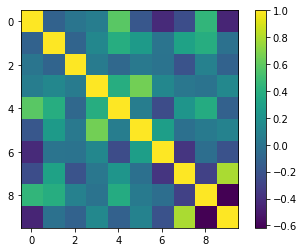

In [ ]:
import matplotlib.pyplot as plt


p = plt.imshow(df_comp.corr())
plt.colorbar(p)

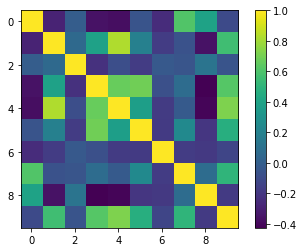

In [ ]:
p = plt.imshow(df_tech.corr())
plt.colorbar(p)

In [ ]:
# y_comp = df_comp['price change in cur']
# y_tech = df_tech['price change in cur']

# df_comp.drop(columns=['price change in cur'], inplace=True)
# df_tech.drop(columns=['price change in cur'], inplace=True)
